## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [ ]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
train, test = keras.datasets.cifar10.load_data()

In [ ]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [ ]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [ ]:
def build_mlp(input_dim, num_nuerons = [512, 256, 128], output_units = 10):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_dim)
    for i, n_units in enumerate(num_nuerons):
      if i == 0:
        hidden_layer = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer_{}'.format(i+1))(input_layer)
      else:
        hidden_layer = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer_{}'.format(i+1))(hidden_layer)
    output_layer = keras.layers.Dense(units=output_units, activation='softmax', name='out_put_layer')(hidden_layer)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [ ]:
"""Code Here
設定超參數
"""
learning_rate = 0.01
epochs = 50
batch_size = 256

In [ ]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in [0.9, 0.8, 0.7]:
  for status in [True, False]:
    keras.backend.clear_session() # 清除舊的紀錄
    print('momentum:{}, nesterov:{}'.format(momentum, status))
    model = build_mlp(input_dim = x_train.shape[1:])
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=status)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True)

    trainning_loss = model.history.history['loss']
    validation_loss = model.history.history['val_loss']
    trainning_acc = model.history.history['accuracy']
    validation_acc = model.history.history['val_accuracy']

    name = 'moment:{}, nesterov:{}'.format(momentum, status)
    results[name] = {'trainning_loss':trainning_loss,
                     'validation_loss':validation_loss,
                     'trainning_accuracy':trainning_acc,
                     'validation_accuracy':validation_acc}


momentum:0.9, nesterov:True
Epoch 1/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9890 - accuracy: 0.2799 - val_loss: 1.7301 - val_accuracy: 0.3751
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6644 - accuracy: 0.4104 - val_loss: 1.5728 - val_accuracy: 0.4452
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5598 - accuracy: 0.4507 - val_loss: 1.5486 - val_accuracy: 0.4534
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.4933 - accuracy: 0.4655 - val_loss: 1.5150 - val_accuracy: 0.4529
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 1.4459 - accuracy: 0.4841 - val_loss: 1.5061 - val_accuracy: 0.4607
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 1.4059 - accuracy: 0.5046 - val_loss: 1.5089 - val_accuracy: 0.4695
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 1.3674 - accuracy: 0.5180 - val_loss: 1.5078 -

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

'Code Here\n將結果繪出\n'

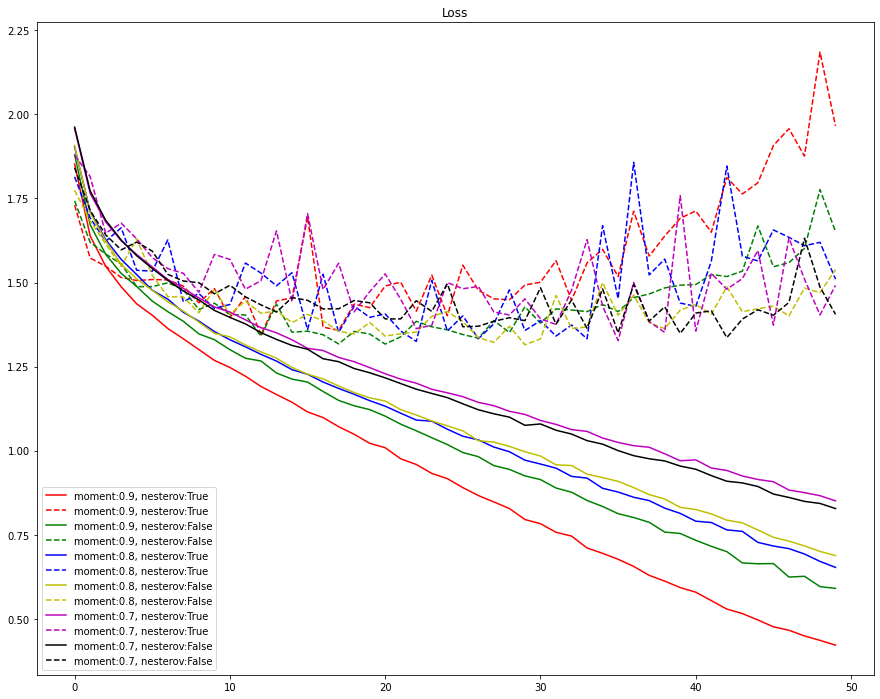

In [ ]:
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']
plt.figure(figsize=(15, 12))
for i, cond in enumerate(results.keys()):
  plt.plot(range(len(results[cond]['trainning_loss'])), results[cond]['trainning_loss'], '-', color = color_bar[i], label = cond)
  plt.plot(range(len(results[cond]['validation_loss'])), results[cond]['validation_loss'], '--', color = color_bar[i], label = cond)
plt.title("Loss")
plt.legend()
plt.show()

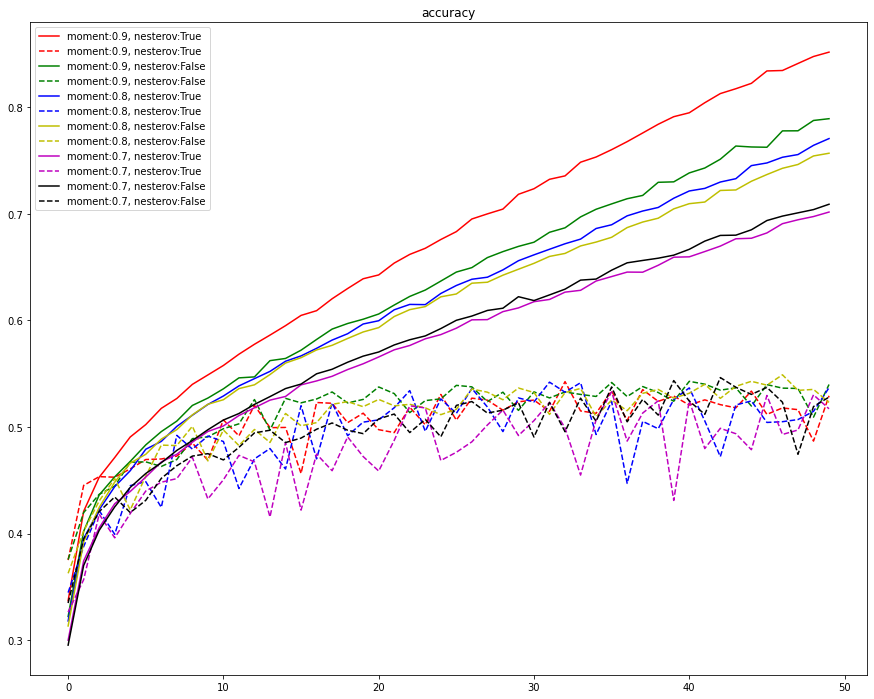

In [ ]:
plt.figure(figsize=(15, 12))
for i, cond in enumerate(results.keys()):
  plt.plot(range(len(results[cond]['trainning_accuracy'])), results[cond]['trainning_accuracy'], '-', color = color_bar[i], label = cond)
  plt.plot(range(len(results[cond]['validation_accuracy'])), results[cond]['validation_accuracy'], '--', color = color_bar[i], label = cond)
plt.title("accuracy")
plt.legend()
plt.show()